# Create a random number generator that is uniformly distributed

## Import the required library

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display,clear_output

## Create a basic random number generator for range (0.0 to 1.0)

### Create a basic seed generator that uses current timestamp

In [11]:
def getSeed(x1:int = 1234, x2:int = 3456 , x3:int = 6789):
    a = int(time.time() * 1000) #Get current time as millisecond
    x = a % x1
    y = a % x2
    z = a % x3
    return x if x != 0 else x1,y if y!= 0 else x2,z if z!= 0 else x3

### Create an uniformly distributed random generator with Wichmann–Hill Algorithm

In [12]:
def random(seed:[int]):
    x = (171 * seed[0]) % 30269
    y = (172 * seed[1]) % 30307
    z = (170 * seed[2]) % 30323
    return (x/30269 + y/30307 + z/30323) % 1

In [13]:
# Try the random generator based on the time seed.
random(getSeed())

0.38479537497092875

## Create a uniform distribuation based random number in range a,b

In [14]:
def uniform(a,b,seed):
    return a + (b-a) * random(seed)

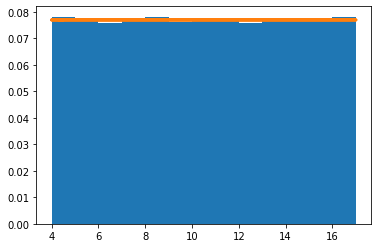

In [46]:
x = []
for i in range(1,100000,1):
    d = (uniform(4,17,getSeed(i,i+1,i+2)))
    x.append(d)
plt.hist(x,density = 2, bins = 17-4)
plt.plot(x, [1/(17-4) for x in range(len(x))],lw =3)

#### Decrease the number of trial

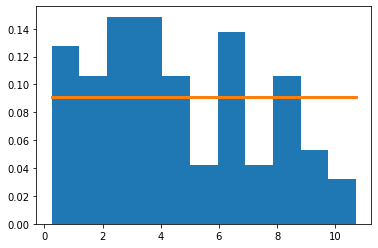

In [45]:
x = []
for i in range(1,100,1):
    d = (uniform(0,11,getSeed(i,i+1,i+2)))
    x.append(d)
plt.hist(x,density = 3, bins = 11)
plt.plot(x, [1/(11-0) for x in range(len(x))],lw =3)

# Try it yourself

## Create a random number that is uniformly distributed

In [18]:
lower = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Lower Bound:',
    value=0
)
upper = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Upper Bound:',
    value=10
)

res = widgets.HTML(
    value="",
    placeholder='Result:',
    description='Result:',
)
btn = widgets.Button(description='Get Random')

display(lower)
display(upper)
display(btn)
display(res)
def btn_eventhandler(obj):
    if not(lower.value >= upper.value):
        res.value = str(uniform(lower.value,upper.value,getSeed()))
    else:
        res.value = str('Upper bound should be higher than lower bound')
btn.on_click(btn_eventhandler)

IntSlider(value=0, description='Lower Bound:', max=50)

IntSlider(value=10, description='Lower Bound:', max=50)

Button(description='Get Random', style=ButtonStyle())

HTML(value='', description='Result:', placeholder='Result:')

In [47]:
lower = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Lower Bound:',
    value=0
)
upper = widgets.IntSlider(
    min=0,
    max=50,
    step=1,
    description='Upper Bound:',
    value=10
)
rep = widgets.IntSlider(
    min=100,
    max=10000,
    step=1,
    description='Repetition:',
    value=10
)

p = widgets.IntProgress(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Calculating:',
    bar_style='success',
    orientation='horizontal'
)
btn = widgets.Button(description='Display')
cal:bool = False

res = widgets.HTML(
    value="",
)


out1 = widgets.Output()
out2 = widgets.Output()
tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'Settings')
tab.set_title(1, 'Result')
display(tab)
with out1:
    display(res)
    display(btn)
    display(lower)
    display(upper)
    display(rep)
    display(p)

def btn_eventhandler(obj):
    x = []
    if not(lower.value >= upper.value):
        with out2:
            clear_output()
            res.value=''
            p.max = rep.value
            p.text='Calculating'
            print('Upper Bound: '+str(upper.value))
            print('Lower Bound:' + str(lower.value))
            for i in range(1,rep.value + 1,1):
                d = (uniform(lower.value,upper.value,getSeed(i,i+1,i+2)))
                x.append(d)
                p.value = i
            p.value = 0
            p.text='Done'
            %matplotlib inline
            fig,ax = plt.subplots()
            ax.hist(x,density = 2,bins=(int(upper.value)-int(lower.value)))
            ax.plot(x, [1/(upper.value-lower.value) for x in range(rep.value)],lw=3)
            plt.show(fig)
    else:
        res.value = str('Upper bound should be higher than lower bound')
btn.on_click(btn_eventhandler)